In [174]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.datasets import make_moons

np.random.seed(19680801)

Text(0.5, 1.0, 'Scatter plot of random samples')

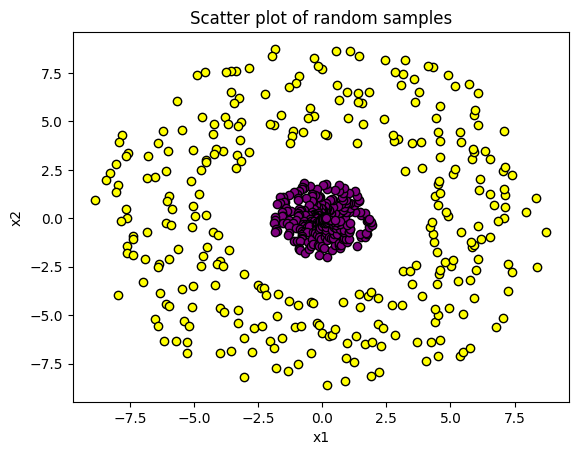

In [175]:
t=np.linspace(0,2*np.pi,300,endpoint=False)
r=np.random.uniform([[2],[4]],[[0],[9]], size=(2,300))
inner=[r[0]*np.cos(t),r[0]*np.sin(t)]
outer=[r[1]*np.cos(t),r[1]*np.sin(t)]

plt.scatter(inner[0],inner[1],c="purple",edgecolor='k')
plt.scatter(outer[0],outer[1],c="yellow",edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of random samples')

In [176]:
a=np.array(inner[0]).reshape(-1,1)
b=np.array(inner[1]).reshape(-1,1)
newInner=np.concatenate((a,b,2*(a**2) + 2*(b**2)),axis=1)

c=np.array(outer[0]).reshape(-1,1)
d=np.array(outer[1]).reshape(-1,1)

newOuter=np.concatenate((c,d,2*(c**2) + 2*(d**2)),axis=1)
data=np.concatenate((newInner,newOuter))
y=np.concatenate((np.zeros(len(newInner)),np.ones(len(newOuter))))

samples1=np.concatenate((a,b),axis=1)
samples2=np.concatenate((c,d),axis=1)
samples=np.concatenate((samples1,samples2))

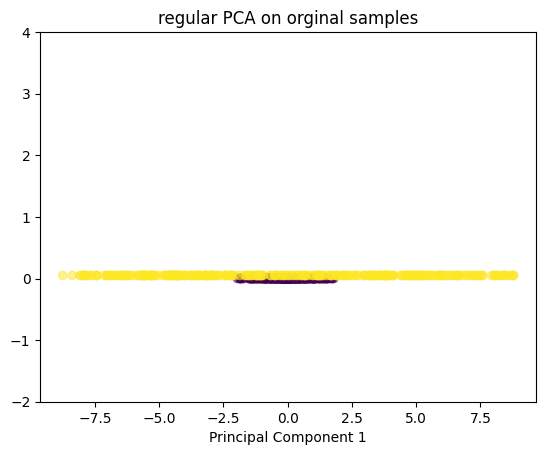

In [177]:
pca = PCA(n_components=1)
n=np.concatenate((a,b),axis=1)
m=np.concatenate((c,d),axis=1)
nm=np.concatenate((n,m))
X_pca = pca.fit_transform(nm)
 
# Plot the results
plt.scatter(X_pca[:, 0], [[0.0]*len(n)+[0.05]*len(m)] ,c=y ,alpha=0.5)
plt.ylim(-2,4)
plt.title('regular PCA on orginal samples')
plt.xlabel('Principal Component 1')
plt.show()

Text(0.5, 0.92, 'samples embedded in a higher dimension')

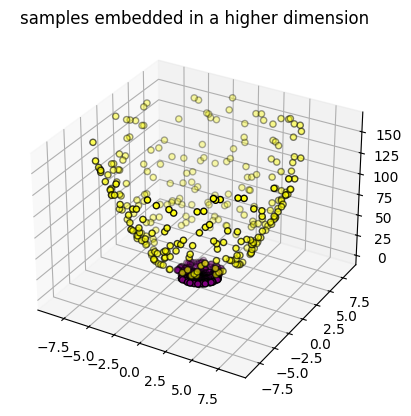

In [178]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(inner[0],inner[1],2*(inner[0]**2) + 2*(inner[1]**2),c="purple",edgecolor='k')
ax.scatter(outer[0],outer[1],2*(outer[0]**2) + 2*(outer[1]**2),c='yellow',edgecolor='k')
plt.title('samples embedded in a higher dimension')

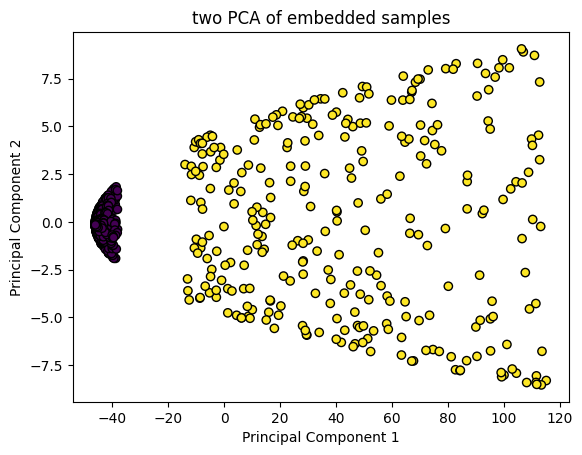

In [179]:

# Apply PCA with two components (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
 
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')

plt.title('two PCA of embedded samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

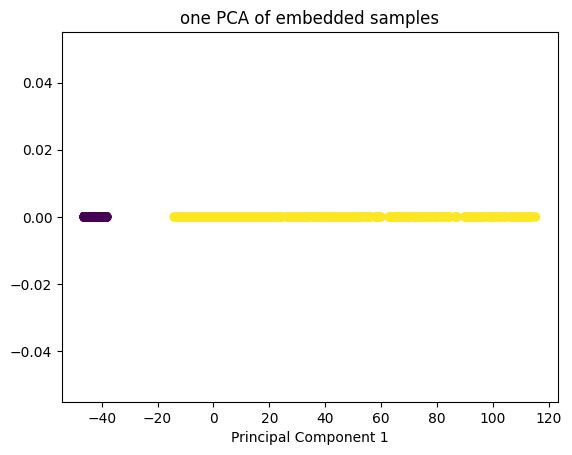

In [180]:
# Apply PCA with one components (visualization)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(data)
 
# Plot the results
plt.scatter(X_pca[:, 0], np.zeros(len(X_pca[:, 0])) ,c=y )
plt.title('one PCA of embedded samples')
plt.xlabel('Principal Component 1')
plt.show()

In [181]:
def gaus_kpca(X, gamma, n_components):

    # Computes the squared Euclidean distance between the points in the matrix.
    # Converting the pairwise distances into a symmetric nXn matrix.
    mat_sq_dists = squareform(pdist(X, 'sqeuclidean'))

    # Computing the MxM kernel matrix.
    K = np.exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
   
    eigvals, eigvecs = eigh(K)

    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    

    # Collect the top k eigenvectors (projected examples)

    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)]) 
    return X_pc

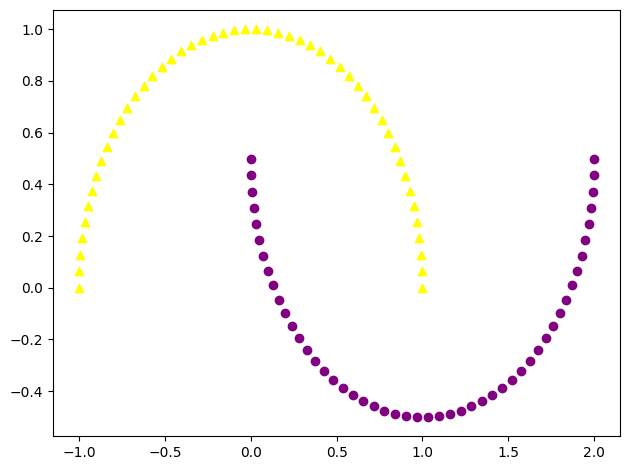

In [182]:
X, y = make_moons(100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
    color='yellow', marker='^')
plt.scatter(X[y==1, 0], X[y==1, 1],
    color='purple', marker='o')
plt.tight_layout()
plt.show()
X_pc = gaus_kpca(samples, gamma=14, n_components=1)


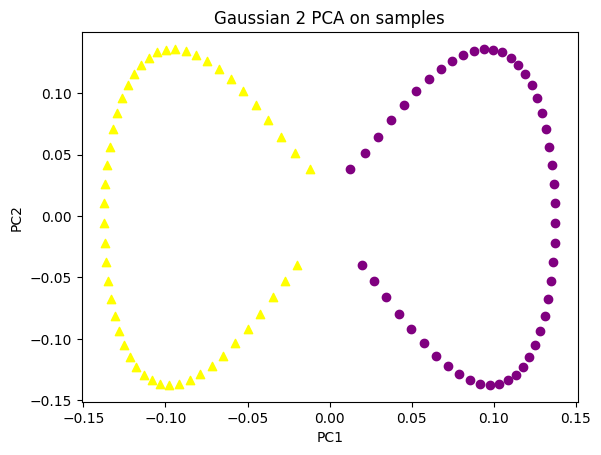

In [183]:
X_kpca = gaus_kpca(X, gamma=15, n_components=2)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='yellow', marker='^')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='purple', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gaussian 2 PCA on samples')
plt.show()

Text(0.5, 1.0, 'Gaussian 1 PCA on samples')

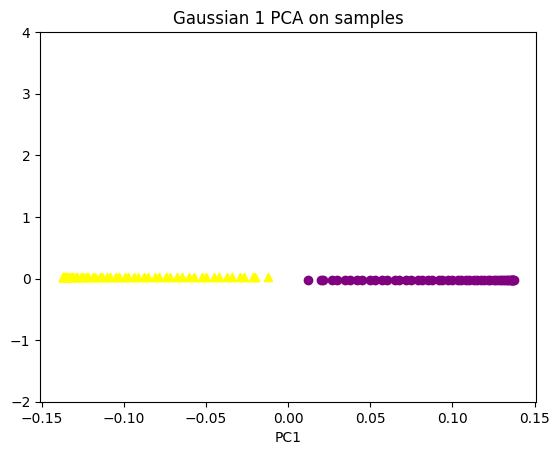

In [184]:
plt.scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='yellow', marker='^')
plt.scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='purple', marker='o')
plt.ylim(-2,4)
plt.xlabel('PC1')
plt.title('Gaussian 1 PCA on samples')